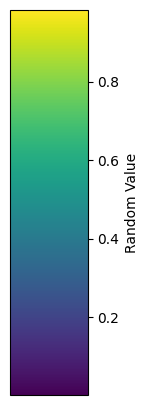

In [68]:
import napari
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import viridis, ScalarMappable
import matplotlib.pyplot as plt

# Create a viewer
viewer = napari.Viewer()

# Generate random points
num_points = 100
points = np.random.rand(num_points, 2) * 512  # Random points in a 512x512 space

# Generate random continuous values for coloring
values = np.random.rand(num_points)

# Normalize the values to the range [0, 1]
norm = Normalize(vmin=values.min(), vmax=values.max())
normalized_values = norm(values)

# Map the normalized values to colors using a colormap
colors = viridis(normalized_values)

# Add the points layer with the mapped colors
viewer.add_points(points, face_color=colors, size=10, edge_color='white', edge_width=0.5)

# Create a legend image using Matplotlib
fig, ax = plt.subplots(figsize=(1, 5), dpi=100)
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap='viridis'), cax=ax)
cbar.set_label('Random Value')
fig.patch.set_alpha(0)  # Set the figure background to be transparent
ax.patch.set_alpha(0)   # Set the axis background to be transparent
fig.canvas.draw()
fig_shape = fig.canvas.get_width_height()[::-1] + (4,)

# Convert the Matplotlib figure to a NumPy array using buffer_rgba
legend_image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
legend_image = legend_image.reshape(fig_shape).copy()

# Add the legend image to the Napari viewer
viewer.add_image(legend_image, name='Color Legend', colormap='gray', opacity=0.8, blending='additive')

# Start the Napari event loop
napari.run()

In [1]:
import numpy as np
import napari
from skimage import data
from matplotlib.backends.backend_qt5agg import FigureCanvas
from matplotlib.figure import Figure
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.gridspec import GridSpec

# Function to update the colorbar
def update_colorbar(cmap, norm):
    static_canvas.figure.clear()  # Clear the current figure
    gs = GridSpec(1, 1, top=1.2, bottom=0.6, left=-0.5, right=1.5)  # Define the grid spec
    axes = static_canvas.figure.add_subplot(gs[0])  # Add subplot with the grid spec
    colorbar = static_canvas.figure.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axes, orientation='horizontal')
    colorbar.set_label('Intensity')
    colorbar.ax.tick_params(labelsize=10)  # Adjust tick label size
    colorbar.set_ticks(np.linspace(norm.vmin, norm.vmax, num=5))  # Set the number of ticks
    axes.set_axis_off()
    static_canvas.draw()  # Redraw the canvas

# Initial setup
blobs_raw = data.binary_blobs(length=64, n_dim=2, volume_fraction=0.1)
viewer = napari.view_image(blobs_raw)

static_canvas = FigureCanvas(Figure(figsize=(5, 5)))
viewer.window.add_dock_widget(static_canvas, area='left', name='Color legend')

# Initial colorbar
cmap = 'viridis'
norm = Normalize(vmin=blobs_raw.min(), vmax=blobs_raw.max())
update_colorbar(cmap, norm)

napari.run()


Invalid schema for package 'ome-types', please run 'npe2 validate ome-types' to check for manifest errors.


c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\napari\layers\utils\color_transformations.py:42: UserWarning: The provided colors parameter contained illegal values, resetting all colors values to white.
  warnings.warn(
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\napari\layers\utils\color_transformations.py:42: UserWarning: The provided colors parameter contained illegal values, resetting all colors values to white.
  warnings.warn(
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\napari\layers\utils\color_transformations.py:42: UserWarning: The provided colors parameter contained illegal values, resetting all colors values to white.
  warnings.warn(
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\napari\layers\utils\color_transformations.py:42: UserWarning: The provided colors parameter contained illegal values, resetting all colors values to white.
  warnings.warn(
c:\Users\ge3

In [5]:

# Example of updating the colorbar with a new colormap
new_cmap = 'plasma'
update_colorbar(new_cmap, norm)

In [8]:
# Initial colorbar
cmap = 'viridis'
norm = Normalize(vmin=blobs_raw.min(), vmax=blobs_raw.max())
update_colorbar(cmap, norm)

In [7]:
# Example of updating the colorbar with a new colormap
new_cmap = 'plasma'
norm = Normalize(vmin=blobs_raw.min(), vmax=blobs_raw.max()*3)
update_colorbar(cmap, norm)

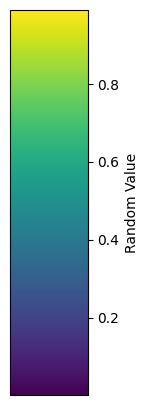

In [71]:
import napari
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import viridis, ScalarMappable
import matplotlib.pyplot as plt

# Generate random points
num_points = 100
points = np.random.rand(num_points, 2) * 512  # Random points in a 512x512 space

# Generate random continuous values for coloring
values = np.random.rand(num_points)

# Normalize the values to the range [0, 1]
norm = Normalize(vmin=values.min(), vmax=values.max())
normalized_values = norm(values)

# Map the normalized values to colors using a colormap
colors = viridis(normalized_values)

# Create a legend image using Matplotlib
fig, ax = plt.subplots(figsize=(1, 5), dpi=100)
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap='viridis'), cax=ax)
cbar.set_label('Random Value')
fig.patch.set_alpha(0)  # Set the figure background to be transparent
ax.patch.set_alpha(0)   # Set the axis background to be transparent
fig.canvas.draw()
fig_shape = fig.canvas.get_width_height()[::-1] + (4,)

# Convert the Matplotlib figure to a NumPy array using buffer_rgba
legend_image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
legend_image = legend_image.reshape(fig_shape).copy()

In [78]:
import numpy as np
import napari
from skimage import data
from matplotlib.backends.backend_qt5agg import FigureCanvas
from matplotlib.figure import Figure
from matplotlib.lines import Line2D



blobs_raw = data.binary_blobs(length=64, n_dim=2, volume_fraction=0.1)
viewer = napari.view_image(blobs_raw)

static_canvas = FigureCanvas(Figure(figsize=(5, 3)))
axes = static_canvas.figure.subplots()

colors = ["crimson", "purple", "gold"]

red_circle = [Line2D([0], [0],
                    marker='o', color='w', label=c,
                    markerfacecolor=c, markersize=15) for c in colors]

axes.legend(handles=red_circle, loc="center", labelspacing=1, borderpad=0.5)
axes.set_axis_off()
viewer.window.add_dock_widget(static_canvas, area='left', name='Color legend')

napari.run()

In [81]:
import numpy as np
import napari
from skimage import data
from matplotlib.backends.backend_qt5agg import FigureCanvas
from matplotlib.figure import Figure
from matplotlib.lines import Line2D

# Function to update the legend
def update_legend(colors):
    static_canvas.figure.clear()  # Clear the current figure
    axes = static_canvas.figure.subplots()  # Create new axes
    legend_handles = [Line2D([0], [0],
                             marker='o', color='w', label=c,
                             markerfacecolor=c, markersize=15) for c in colors]
    axes.legend(handles=legend_handles, loc="center", labelspacing=1, borderpad=0.5)
    axes.set_axis_off()
    static_canvas.draw()  # Redraw the canvas

# Initial setup
blobs_raw = data.binary_blobs(length=64, n_dim=2, volume_fraction=0.1)
viewer = napari.view_image(blobs_raw)

static_canvas = FigureCanvas(Figure(figsize=(5, 3)))
viewer.window.add_dock_widget(static_canvas, area='left', name='Color legend')

# Initial legend
initial_colors = ["crimson", "purple", "gold"]
update_legend(initial_colors)

napari.run()

In [82]:

# Example of updating the legend with new colors
new_colors = ["blue", "green", "orange"]
update_legend(new_colors)

In [90]:
import numpy as np
import napari
from skimage import data
from matplotlib.backends.backend_qt5agg import FigureCanvas
from matplotlib.figure import Figure
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Function to update the colorbar
def update_colorbar(cmap, norm):
    static_canvas.figure.clear()  # Clear the current figure
    axes = static_canvas.figure.subplots()  # Create new axes
    #axes = static_canvas.figure.add_axes([0.5, 0.8, 0.8, 0.1])  # [left, bottom, width, height]
    colorbar = static_canvas.figure.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axes, orientation='horizontal')
    colorbar.set_label('Intensity')
    axes.set_axis_off()
    static_canvas.draw()  # Redraw the canvas

# Initial setup
blobs_raw = data.binary_blobs(length=64, n_dim=2, volume_fraction=0.1)
viewer = napari.view_image(blobs_raw)

static_canvas = FigureCanvas(Figure(figsize=(5, 3)))
viewer.window.add_dock_widget(static_canvas, area='left', name='Color legend')

# Initial colorbar
cmap = 'viridis'
norm = Normalize(vmin=blobs_raw.min(), vmax=blobs_raw.max())
update_colorbar(cmap, norm)

napari.run()

# Example of updating the colorbar with a new colormap
new_cmap = 'plasma'
update_colorbar(new_cmap, norm)

In [94]:
import numpy as np
import napari
from skimage import data
from matplotlib.backends.backend_qt5agg import FigureCanvas
from matplotlib.figure import Figure
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Function to update the colorbar
def update_colorbar(cmap, norm):
    static_canvas.figure.clear()  # Clear the current figure
    axes = static_canvas.figure.subplots()  # Create new axes
    #axes = static_canvas.figure.add_axes([0.5, 0.8, 0.8, 0.1])  # [left, bottom, width, height]
    colorbar = static_canvas.figure.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axes, orientation='horizontal')
    colorbar.set_label('Intensity')
    axes.set_axis_off()
    static_canvas.draw()  # Redraw the canvas

# Initial setup
blobs_raw = data.binary_blobs(length=64, n_dim=2, volume_fraction=0.1)
viewer = napari.view_image(blobs_raw)

static_canvas = FigureCanvas(Figure(figsize=(5, 1)))

viewer.window.add_dock_widget(static_canvas, area='left', name='Color legend')

# Initial colorbar
cmap = 'viridis'
norm = Normalize(vmin=blobs_raw.min(), vmax=blobs_raw.max())
update_colorbar(cmap, norm)

napari.run()

# Example of updating the colorbar with a new colormap
new_cmap = 'plasma'
update_colorbar(new_cmap, norm)

In [115]:
import numpy as np
import napari
from skimage import data
from matplotlib.backends.backend_qt5agg import FigureCanvas
from matplotlib.figure import Figure
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.gridspec import GridSpec

# Function to update the colorbar
def update_colorbar(cmap, norm):
    static_canvas.figure.clear()  # Clear the current figure
    gs = GridSpec(1, 1, top=1.2, bottom=0.6, left=-0.5, right=1.5)  # Define the grid spec
    axes = static_canvas.figure.add_subplot(gs[0])  # Add subplot with the grid spec
    colorbar = static_canvas.figure.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axes, orientation='horizontal')
    colorbar.set_label('Intensity')
    colorbar.ax.tick_params(labelsize=10)  # Adjust tick label size
    colorbar.set_ticks(np.linspace(norm.vmin, norm.vmax, num=5))  # Set the number of ticks
    axes.set_axis_off()
    static_canvas.draw()  # Redraw the canvas

# Initial setup
blobs_raw = data.binary_blobs(length=64, n_dim=2, volume_fraction=0.1)
viewer = napari.view_image(blobs_raw)

static_canvas = FigureCanvas(Figure(figsize=(5, 5)))
viewer.window.add_dock_widget(static_canvas, area='left', name='Color legend')

# Initial colorbar
cmap = 'viridis'
norm = Normalize(vmin=blobs_raw.min(), vmax=blobs_raw.max())
update_colorbar(cmap, norm)

napari.run()

# Example of updating the colorbar with a new colormap
new_cmap = 'plasma'
update_colorbar(new_cmap, norm)

In [9]:
import numpy as np
import napari
from skimage import data
from matplotlib.backends.backend_qt5agg import FigureCanvas
from matplotlib.figure import Figure
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.gridspec import GridSpec
from qtpy.QtWidgets import QPushButton, QVBoxLayout, QWidget

# Function to update the colorbar
def update_colorbar(cmap, norm):
    static_canvas.figure.clear()  # Clear the current figure
    gs = GridSpec(1, 1, top=1.2, bottom=0.6, left=-0.5, right=1.5)  # Define the grid spec
    axes = static_canvas.figure.add_subplot(gs[0])  # Add subplot with the grid spec
    colorbar = static_canvas.figure.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axes, orientation='horizontal')
    colorbar.set_label('Intensity')
    colorbar.ax.tick_params(labelsize=10)  # Adjust tick label size
    colorbar.set_ticks(np.linspace(norm.vmin, norm.vmax, num=5))  # Set the number of ticks
    axes.set_axis_off()
    static_canvas.draw()  # Redraw the canvas

# Function to add random points and update the colorbar
def add_random_points():
    points = np.random.rand(10, 2) * np.array([blobs_raw.shape[0], blobs_raw.shape[1]])
    colors = np.random.rand(10)
    viewer.add_points(points, face_color=colors, size=10)

    # Update colorbar with new normalization based on random colors
    norm = Normalize(vmin=colors.min(), vmax=colors.max())
    update_colorbar(cmap, norm)

# Initial setup
blobs_raw = data.binary_blobs(length=64, n_dim=2, volume_fraction=0.1)
viewer = napari.view_image(blobs_raw)

static_canvas = FigureCanvas(Figure(figsize=(5, 5)))
viewer.window.add_dock_widget(static_canvas, area='left', name='Color legend')

# Initial colorbar
cmap = 'viridis'
norm = Normalize(vmin=blobs_raw.min(), vmax=blobs_raw.max())
update_colorbar(cmap, norm)

# Create a widget with a button to add random points
widget = QWidget()
layout = QVBoxLayout()
button = QPushButton('Add Random Points')
button.clicked.connect(add_random_points)
layout.addWidget(button)
widget.setLayout(layout)
viewer.window.add_dock_widget(widget, area='right', name='Add Points')

napari.run()

In [10]:
import numpy as np
import napari
from skimage import data
from matplotlib.backends.backend_qt5agg import FigureCanvas
from matplotlib.figure import Figure
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.gridspec import GridSpec
from qtpy.QtWidgets import QPushButton, QVBoxLayout, QWidget

# Function to update the colorbar
def update_colorbar(layer):
    static_canvas.figure.clear()  # Clear the current figure
    gs = GridSpec(1, 1, top=1.2, bottom=0.6, left=-0.5, right=1.5)  # Define the grid spec
    axes = static_canvas.figure.add_subplot(gs[0])  # Add subplot with the grid spec

    # Get the colormap and normalization from the layer
    cmap = layer.colormap.name if hasattr(layer, 'colormap') else 'viridis'
    norm = Normalize(vmin=layer.data.min(), vmax=layer.data.max())

    colorbar = static_canvas.figure.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axes, orientation='horizontal')
    colorbar.set_label('Intensity')
    colorbar.ax.tick_params(labelsize=10)  # Adjust tick label size
    colorbar.set_ticks(np.linspace(norm.vmin, norm.vmax, num=5))  # Set the number of ticks
    axes.set_axis_off()
    static_canvas.draw()  # Redraw the canvas

# Function to add random points and update the colorbar
def add_random_points():
    points = np.random.rand(10, 2) * np.array([blobs_raw.shape[0], blobs_raw.shape[1]])
    colors = np.random.rand(10)
    points_layer = viewer.add_points(points, face_color=colors, size=10)

    # Update colorbar with new normalization based on random colors
    update_colorbar(points_layer)

# Initial setup
blobs_raw = data.binary_blobs(length=64, n_dim=2, volume_fraction=0.1)
viewer = napari.view_image(blobs_raw)

static_canvas = FigureCanvas(Figure(figsize=(5, 5)))
viewer.window.add_dock_widget(static_canvas, area='left', name='Color legend')

# Initial colorbar
update_colorbar(viewer.layers[-1])

# Create a widget with a button to add random points
widget = QWidget()
layout = QVBoxLayout()
button = QPushButton('Add Random Points')
button.clicked.connect(add_random_points)
layout.addWidget(button)
widget.setLayout(layout)
viewer.window.add_dock_widget(widget, area='right', name='Add Points')

# Connect to layer change event to update colorbar based on the top visible layer
def on_layer_change(event):
    if viewer.layers:
        top_visible_layer = next((layer for layer in reversed(viewer.layers) if layer.visible), None)
        if top_visible_layer:
            update_colorbar(top_visible_layer)

viewer.layers.events.changed.connect(on_layer_change)

napari.run()

In [92]:
static_canvas.

RuntimeError: wrapped C/C++ object of type FigureCanvasQTAgg has been deleted

In [79]:
static_canvas.update()

In [77]:
viewer.window.add_dock_widget(static_canvas, area='left', name='Color legend')


In [75]:
static_canvas

In [ ]:

# Add the legend image to the Napari viewer
viewer.add_image(legend_image, name='Color Legend', colormap='gray', opacity=0.8, blending='additive')

# Start the Napari event loop
napari.run()

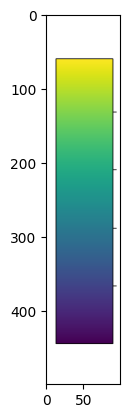

In [70]:
plt.imshow(legend_image)

In [69]:
fig_shape

(500, 100, 4)

In [38]:
l = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)

In [45]:
l

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [44]:
l.reshape((100,500,4))

ValueError: cannot reshape array of size 239760 into shape (100,500,4)

In [40]:
l.reshape(fig.canvas.get_width_height()[::-1] + (3,))

ValueError: cannot reshape array of size 239760 into shape (500,100,3)

In [42]:
fig.canvas.get_width_height()

(100, 500)

In [41]:
500*100*3

150000

In [29]:
l.shape

(239760,)

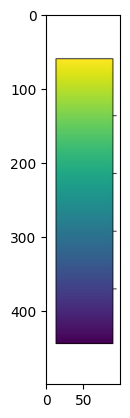

In [13]:
plt.imshow(legend_image)

C:\Users\ge37voy\AppData\Local\Temp\ipykernel_25692\1546516849.py:36: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  legend_image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


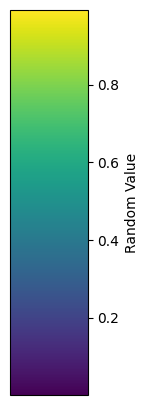

In [7]:
import napari
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import viridis, ScalarMappable
import matplotlib.pyplot as plt

# Create a viewer
viewer = napari.Viewer()

# Generate random points
num_points = 100
points = np.random.rand(num_points, 2) * 512  # Random points in a 512x512 space

# Generate random continuous values for coloring
values = np.random.rand(num_points)

# Normalize the values to the range [0, 1]
norm = Normalize(vmin=values.min(), vmax=values.max())
normalized_values = norm(values)

# Map the normalized values to colors using a colormap
colors = viridis(normalized_values)

# Add the points layer with the mapped colors
viewer.add_points(points, face_color=colors, size=10, edge_color='white', edge_width=0.5)

# Create a legend image using Matplotlib
fig, ax = plt.subplots(figsize=(1, 5), dpi=100, facecolor='none')
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap='viridis'), cax=ax)
cbar.set_label('Random Value')
fig.patch.set_alpha(0)  # Set the figure background to be transparent
ax.patch.set_alpha(0)   # Set the axis background to be transparent
fig.canvas.draw()

# Convert the Matplotlib figure to a NumPy array
legend_image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
legend_image = legend_image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

# Add the legend image to the Napari viewer
viewer.add_image(legend_image, name='Color Legend', colormap='gray', opacity=0.8, blending='additive')

# Optionally, add text annotations for the legend
#viewer.add_text('Color Legend', position=(550, 50), color='white', size=20)

# Start the Napari event loop
napari.run()